In [38]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

In [39]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")
train_df_y = train_df[["y"]]
train_df = train_df.drop(["y"],axis=1)
train_df_y.reset_index()
df = pd.concat([train_df,test_df])
df['datetime'] = pd.to_datetime(df.datetime)

In [40]:
df_time = df["datetime"]

In [41]:
train_df_time = df_time[0:2101].reset_index()
train_df_time = pd.concat([train_df_time,train_df_y],axis=1)
train_df_time = train_df_time.drop("index",axis=1)
test_df_time = df_time[2101:]

In [48]:
train_df_time =train_df_time.set_index('datetime')

In [49]:
train_df_time

,y
datetime,
2010-07-01,17
2010-07-02,18
2010-07-03,20
2010-07-04,20
2010-07-05,14
2010-07-06,14
2010-07-07,4
2010-07-08,10
2010-07-09,12


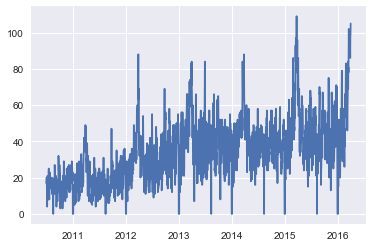

In [10]:
plt.plot(train_df_time["datetime"],train_df_time["y"])

In [50]:
diff = train_df_time - train_df_time.shift()

In [51]:
diff

,y
datetime,
2010-07-01,NaN
2010-07-02,1.0
2010-07-03,2.0
2010-07-04,0.0
2010-07-05,-6.0
2010-07-06,0.0
2010-07-07,-10.0
2010-07-08,6.0
2010-07-09,2.0


In [22]:
# 自己相関を求める
ts_acf = sm.tsa.stattools.acf(train_df_time["y"], nlags=40)
ts_acf

array([ 1.        ,  0.85250572,  0.759961  ,  0.68890917,  0.64602919,
        0.64267837,  0.66746208,  0.66523329,  0.59934478,  0.51926247,
        0.46666291,  0.4444803 ,  0.45345041,  0.49585008,  0.5118773 ,
        0.47835362,  0.43309258,  0.39872676,  0.39344206,  0.42333793,
        0.4684572 ,  0.49905791,  0.47405398,  0.445358  ,  0.41986308,
        0.43063562,  0.47263082,  0.52583217,  0.55221304,  0.53251079,
        0.48946383,  0.44606089,  0.43605401,  0.4468801 ,  0.47483998,
        0.46987822,  0.4201837 ,  0.34909949,  0.29998386,  0.27766204,
        0.29720363])

In [52]:
ts_pacf = sm.tsa.stattools.pacf(train_df_time, nlags=40, method='ols')
ts_pacf

array([ 1.        ,  0.8592448 ,  0.12698946,  0.06519502,  0.09859137,
        0.18600945,  0.21229956,  0.04673878, -0.1805407 , -0.13573993,
        0.01370732,  0.06628962,  0.07393948,  0.15330255,  0.0801814 ,
       -0.03436433, -0.02145231,  0.00318005,  0.04107656,  0.08022389,
        0.07780901,  0.07826931, -0.04441719,  0.03032464,  0.01208755,
        0.0950062 ,  0.09775656,  0.08675231,  0.04164905, -0.02258481,
       -0.03888114, -0.05241783,  0.01102822, -0.02703068,  0.01999908,
       -0.045635  , -0.09784824, -0.09833456, -0.00308171, -0.01556311,
        0.03735811])

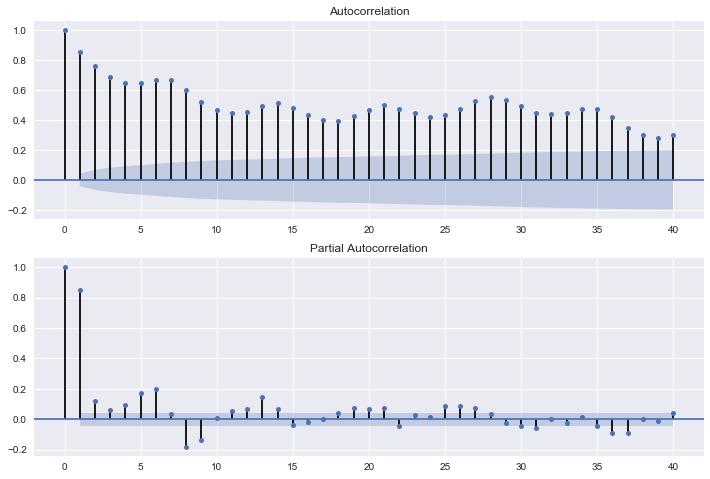

In [53]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df_time, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df_time, lags=40, ax=ax2)

In [54]:
diff = train_df_time- train_df_time.shift()
diff = diff.dropna()
diff.head()

,y
datetime,
2010-07-02,1.0
2010-07-03,2.0
2010-07-04,0.0
2010-07-05,-6.0
2010-07-06,0.0


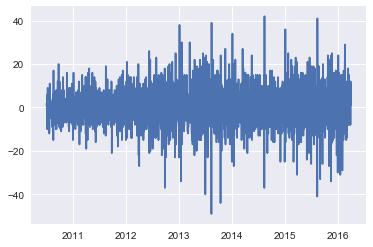

In [55]:
plt.plot(diff)

In [56]:
diff

,y
datetime,
2010-07-02,1.0
2010-07-03,2.0
2010-07-04,0.0
2010-07-05,-6.0
2010-07-06,0.0
2010-07-07,-10.0
2010-07-08,6.0
2010-07-09,2.0
2010-07-10,9.0


In [57]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
resDiff

/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).cop

{'aic':               0             1             2
 0           NaN  15249.683532  15160.722592
 1  15278.888978  15080.016580  15081.317129
 2  15253.278973  15081.239772           NaN
 3  15215.062848  15081.012276           NaN
 4  15118.978669  15053.203372  14784.078977, 'aic_min_order': (4, 2)}

In [60]:
train_df_time["y"].astype(float)

datetime
2010-07-01     17.0
2010-07-02     18.0
2010-07-03     20.0
2010-07-04     20.0
2010-07-05     14.0
2010-07-06     14.0
2010-07-07      4.0
2010-07-08     10.0
2010-07-09     12.0
2010-07-10     21.0
2010-07-11     15.0
2010-07-12     11.0
2010-07-13      8.0
2010-07-14     13.0
2010-07-15      8.0
2010-07-16     16.0
2010-07-17     23.0
2010-07-18     25.0
2010-07-19     18.0
2010-07-20     21.0
2010-07-21      9.0
2010-07-22      8.0
2010-07-23     12.0
2010-07-24     23.0
2010-07-25     18.0
2010-07-26     18.0
2010-07-27     14.0
2010-07-28     18.0
2010-07-29     19.0
2010-07-30     15.0
              ...  
2016-03-02     59.0
2016-03-03     53.0
2016-03-04     62.0
2016-03-05     67.0
2016-03-06     59.0
2016-03-07     53.0
2016-03-08     46.0
2016-03-09     56.0
2016-03-10     60.0
2016-03-11     66.0
2016-03-12     84.0
2016-03-13     77.0
2016-03-14     69.0
2016-03-15     81.0
2016-03-16     78.0
2016-03-17     87.0
2016-03-18    102.0
2016-03-19     94.0
2016-03-20 

In [62]:
from statsmodels.tsa.arima_model import ARIMA
ARIMA_3_1_2 = ARIMA(train_df_time["y"].astype(float), order=(4, 1, 2)).fit(dist=False)
ARIMA_3_1_2.params

/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


const        0.040983
ar.L1.D.y    0.870609
ar.L2.D.y   -0.700953
ar.L3.D.y   -0.163696
ar.L4.D.y   -0.170434
ma.L1.D.y   -1.241979
ma.L2.D.y    0.988840
dtype: float64

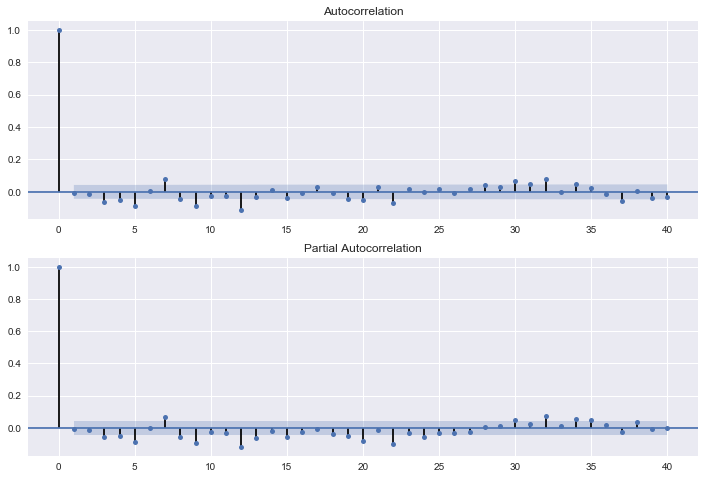

In [63]:
resid = ARIMA_3_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [91]:
#2010-07-01から2016-03-31
#2016-04-01から2017-03-31
ARIMA_3_1_2.predict('2015-04-01', '2017-03-31')

2015-04-01    1.718418
2015-04-02    7.407251
2015-04-03    7.387336
2015-04-04    0.376564
2015-04-05   -4.006474
2015-04-06    1.894458
2015-04-07    0.082076
2015-04-08   -0.519111
2015-04-09    1.142199
2015-04-10    4.034118
2015-04-11    1.448608
2015-04-12    0.155334
2015-04-13    0.668273
2015-04-14   -0.479538
2015-04-15    2.949533
2015-04-16   -1.619658
2015-04-17    8.592390
2015-04-18    5.088701
2015-04-19   -3.383006
2015-04-20   -4.193060
2015-04-21    0.216871
2015-04-22   -3.547094
2015-04-23   -6.114633
2015-04-24    8.417572
2015-04-25    6.242848
2015-04-26   -2.987981
2015-04-27   -4.182193
2015-04-28   -7.076351
2015-04-29   -4.629902
2015-04-30   -2.277904
                ...   
2017-03-02    2.698134
2017-03-03    5.646598
2017-03-04    4.374409
2017-03-05   -0.159765
2017-03-06   -4.541800
2017-03-07   -5.472866
2017-03-08   -2.252812
2017-03-09    2.693326
2017-03-10    5.641635
2017-03-11    4.373027
2017-03-12   -0.156527
2017-03-13   -4.536380
2017-03-14 

In [69]:
import statsmodels.api as sm
sarima = sm.tsa.SARIMAX(
    train_df_time["y"].astype(float), order=(p,d,q), 
    seasonal_order=(sp,sd,sq,4), 
    enforce_stationarity = False, 
    enforce_invertibility = False)

NameError: name 'p' is not defined

In [70]:
import statsmodels.api as sm

# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,4), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.iloc[num]["aic"] = sarima.aic
                        num = num + 1

# モデルごとの結果確認
print(modelSelection)

# AIC最小モデル
print(modelSelection[modelSelection.aic == min(modelSelection.aic)])

NameError: name 'max_p' is not defined

In [65]:
# SARIMAモデルを「決め打ち」で推定する
import statsmodels.api as sm

SARIMA_3_1_2_111 = sm.tsa.SARIMAX(train_df_time["y"].astype(float), order=(3,1,2), seasonal_order=(1,1,1,12)).fit()
print(SARIMA_3_1_2_111.summary())

ValueError: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.

In [71]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern

192

In [73]:
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            train_df_time["y"].astype(float), order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.ix[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.ix[num]["aic"] = sarima.aic
                        num = num + 1

/Users/haradakeno/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/

/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/haradakeno/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood

In [74]:
modelSelection

,model,aic
0,"order=(1,0,0), season=(0,0,0)",15327.4
1,"order=(1,0,0), season=(0,0,1)",15221.5
2,"order=(1,0,0), season=(0,1,0)",16591.9
3,"order=(1,0,0), season=(0,1,1)",15060.1
4,"order=(1,0,0), season=(1,0,0)",15228.4
5,"order=(1,0,0), season=(1,0,1)",15120.2
6,"order=(1,0,0), season=(1,1,0)",15932.5
7,"order=(1,0,0), season=(1,1,1)",15053.8
8,"order=(1,0,1), season=(0,0,0)",15232.6
9,"order=(1,0,1), season=(0,0,1)",15106


In [75]:
# AIC最小モデル
modelSelection[modelSelection.aic == min(modelSelection.aic)]

,model,aic
159,"order=(3,0,3), season=(1,1,1)",14607.2


In [77]:
bestSARIMA = sm.tsa.SARIMAX(train_df_time["y"].astype(float), order=(3,0,3), seasonal_order=(1,1,1,12), enforce_stationarity = False, enforce_invertibility = False).fit()

In [78]:
print(bestSARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 2101
Model:             SARIMAX(3, 0, 3)x(1, 1, 1, 12)   Log Likelihood               -7294.616
Date:                            Thu, 05 Oct 2017   AIC                          14607.233
Time:                                    00:50:48   BIC                          14658.084
Sample:                                07-01-2010   HQIC                         14625.858
                                     - 03-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1850      0.008    267.736      0.000       2.169       2.201
ar.L2         -2.1701      0.010   

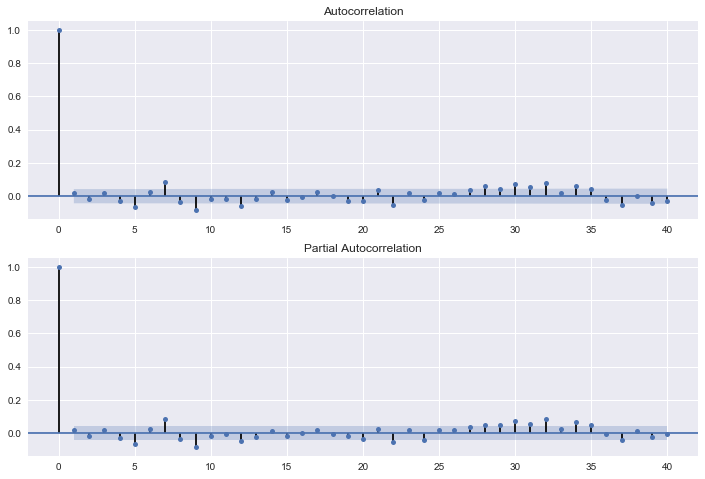

In [79]:
# 残差のチェック
residSARIMA = bestSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

In [95]:
bestPred = bestSARIMA.predict('2015-03-01', '2017-03-31')

In [96]:
bestPred

2015-03-01    76.258314
2015-03-02    60.011851
2015-03-03    44.390747
2015-03-04    43.906193
2015-03-05    48.832925
2015-03-06    53.143368
2015-03-07    56.470742
2015-03-08    46.915979
2015-03-09    41.585869
2015-03-10    38.400135
2015-03-11    42.032684
2015-03-12    48.905491
2015-03-13    58.055702
2015-03-14    58.883183
2015-03-15    64.552155
2015-03-16    59.638121
2015-03-17    72.609494
2015-03-18    78.819641
2015-03-19    82.429440
2015-03-20    92.547309
2015-03-21    90.641801
2015-03-22    83.420702
2015-03-23    77.495217
2015-03-24    74.322270
2015-03-25    87.642125
2015-03-26    80.653399
2015-03-27    86.491335
2015-03-28    91.029606
2015-03-29    88.470877
2015-03-30    85.109764
                ...    
2017-03-02    44.929742
2017-03-03    52.529642
2017-03-04    57.109047
2017-03-05    57.769110
2017-03-06    51.637263
2017-03-07    43.345768
2017-03-08    40.727824
2017-03-09    41.876230
2017-03-10    49.047194
2017-03-11    57.581727
2017-03-12    59

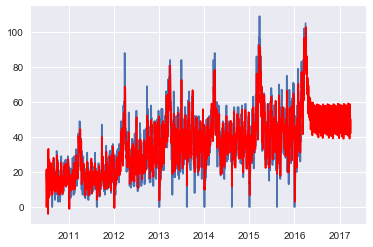

In [94]:
plt.plot(train_df_time["y"].astype(float))
plt.plot(bestPred, "r")

In [ ]:
#https://qiita.com/mshinoda88/items/749131478bfefc9bf365
#https://logics-of-blue.com/wp-content/uploads/2017/05/python-time-series-analysis-notebook.html
#時系列データの読み込み
#https://logics-of-blue.com/python-time-series-analysis/